<a href="https://colab.research.google.com/github/AntonioBorz/CourseWork_ClassicML/blob/main/1_EDA_Borzunov_A_A_CML_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Разведочный анализ данных (EDA)**

In [1]:
# Импортируем необходимые библиотеки
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import shapiro, normaltest, yeojohnson
import missingno as msno
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загружаем данные
drive.mount('/content/drive')
dataframe = pd.read_excel('/content/drive/MyDrive/Данные_для_курсовои_Классическое_МО.xlsx')

Mounted at /content/drive


1.1. Первое знакомство с данными от химиков

In [3]:
# Выводим базовую информацию о датасете
print(f'Количество строк: {len(dataframe)}')
print(f'Количество столбцов: {len(dataframe.columns)}')
print('\nТипы данных:')
type_counts = dataframe.dtypes.value_counts()
for dtype, count in type_counts.items():
  print(f"{str(dtype)}: {count} колонок")

Количество строк: 1001
Количество столбцов: 214

Типы данных:
int64: 107 колонок
float64: 107 колонок


In [4]:
# Посмотрим первые строчки
dataframe.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Создаем копию для обработки
df = dataframe.copy()

In [6]:
# Удаляем индексный столбец
df = df.drop('Unnamed: 0', axis=1)

In [8]:
# Определяем целевые переменные
target_columns = ['IC50, mM', 'CC50, mM', 'SI']
feature_columns = [col for col in df.columns if col not in target_columns]

print(f"Целевые переменные:")
for col in target_columns:
    if col in df.columns:
        print(f"  {col}: {df[col].dtype}, пропусков: {df[col].isnull().sum()}")

Целевые переменные:
  IC50, mM: float64, пропусков: 0
  CC50, mM: float64, пропусков: 0
  SI: float64, пропусков: 0


В целевых пропусков нет, посмотрим на весь датасет.

<Figure size 1500x1000 with 0 Axes>

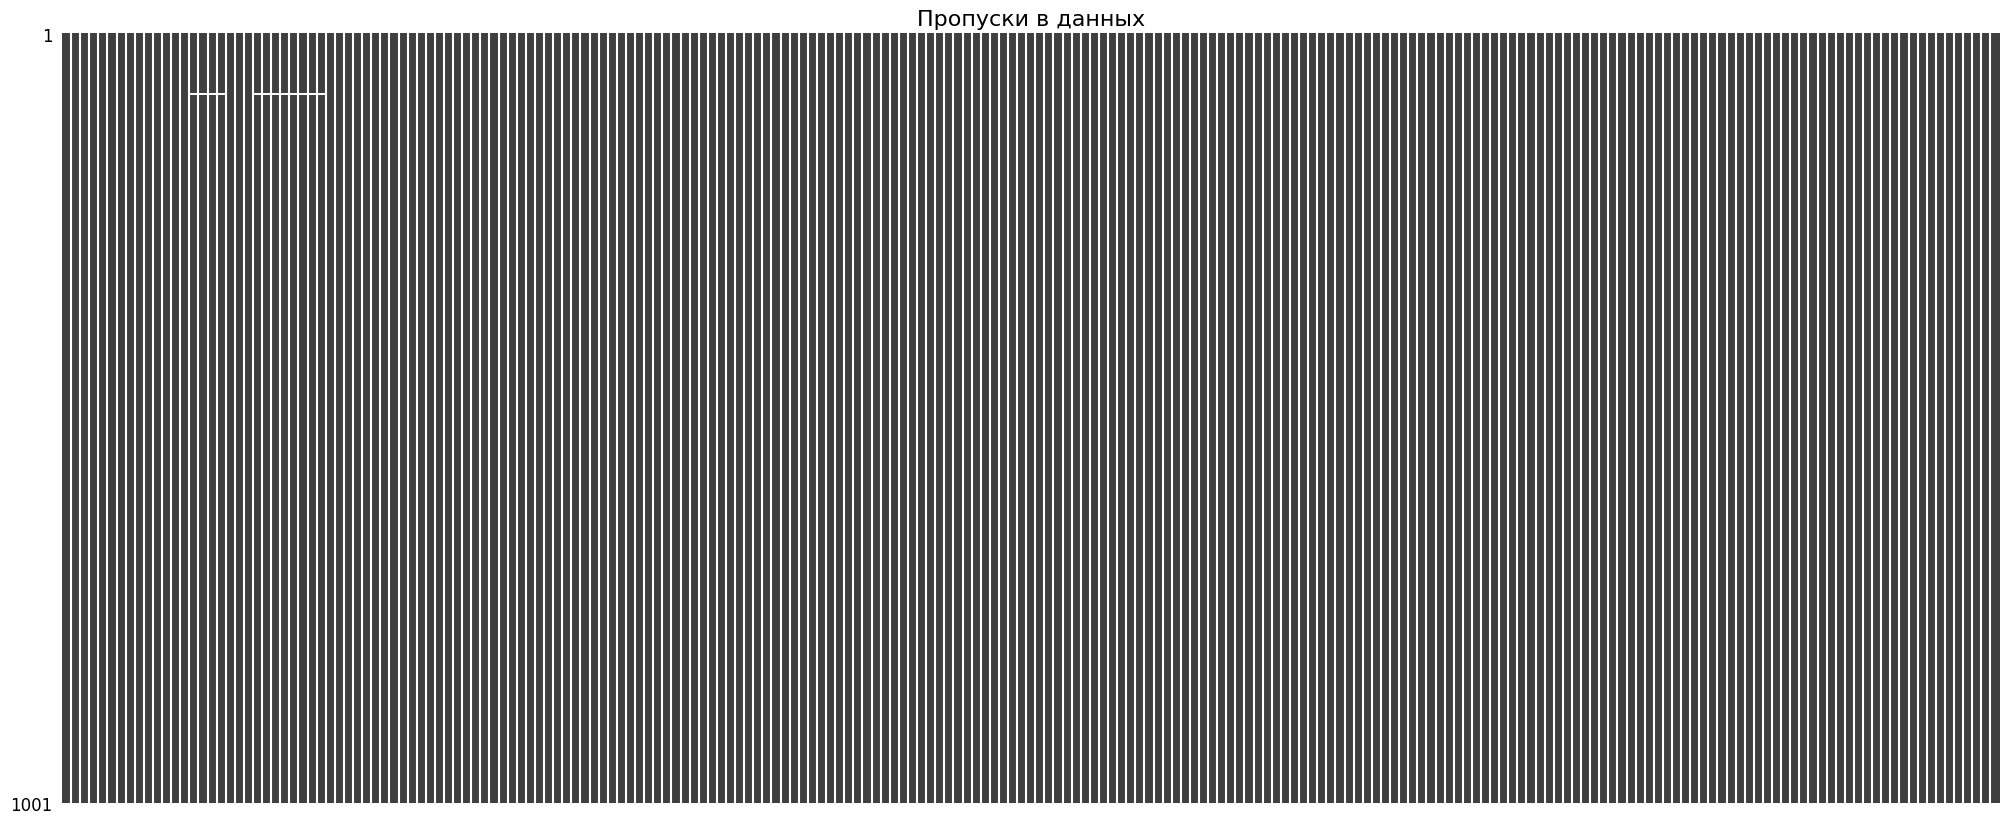

In [9]:
# Посмотрим на пропуски в данных
plt.figure(figsize=(15, 10))
msno.matrix(df, sparkline=False, fontsize=10)
plt.title('Пропуски в данных', fontsize=16)
plt.show()

В глазах рябит, но пропуски, очевидно есть. Посмотрим данные поближе.


Столбцы с пропусками:
MinAbsPartialCharge           : 3 пропуска(ов) (0.30%)
MaxPartialCharge              : 3 пропуска(ов) (0.30%)
MinPartialCharge              : 3 пропуска(ов) (0.30%)
MaxAbsPartialCharge           : 3 пропуска(ов) (0.30%)
BCUT2D_MWHI                   : 3 пропуска(ов) (0.30%)
BCUT2D_MRLOW                  : 3 пропуска(ов) (0.30%)
BCUT2D_MRHI                   : 3 пропуска(ов) (0.30%)
BCUT2D_LOGPLOW                : 3 пропуска(ов) (0.30%)
BCUT2D_LOGPHI                 : 3 пропуска(ов) (0.30%)
BCUT2D_CHGLO                  : 3 пропуска(ов) (0.30%)
BCUT2D_CHGHI                  : 3 пропуска(ов) (0.30%)
BCUT2D_MWLOW                  : 3 пропуска(ов) (0.30%)

Неповторяющиеся (уникальные) значения:
NumRadicalElectrons      : 1 уникальных значений
PEOE_VSA13               : 19 уникальных значений
PEOE_VSA5                : 14 уникальных значений
SMR_VSA2                 : 5 уникальных значений
SMR_VSA8                 : 1 уникальных значений
SlogP_VSA11              : 12 

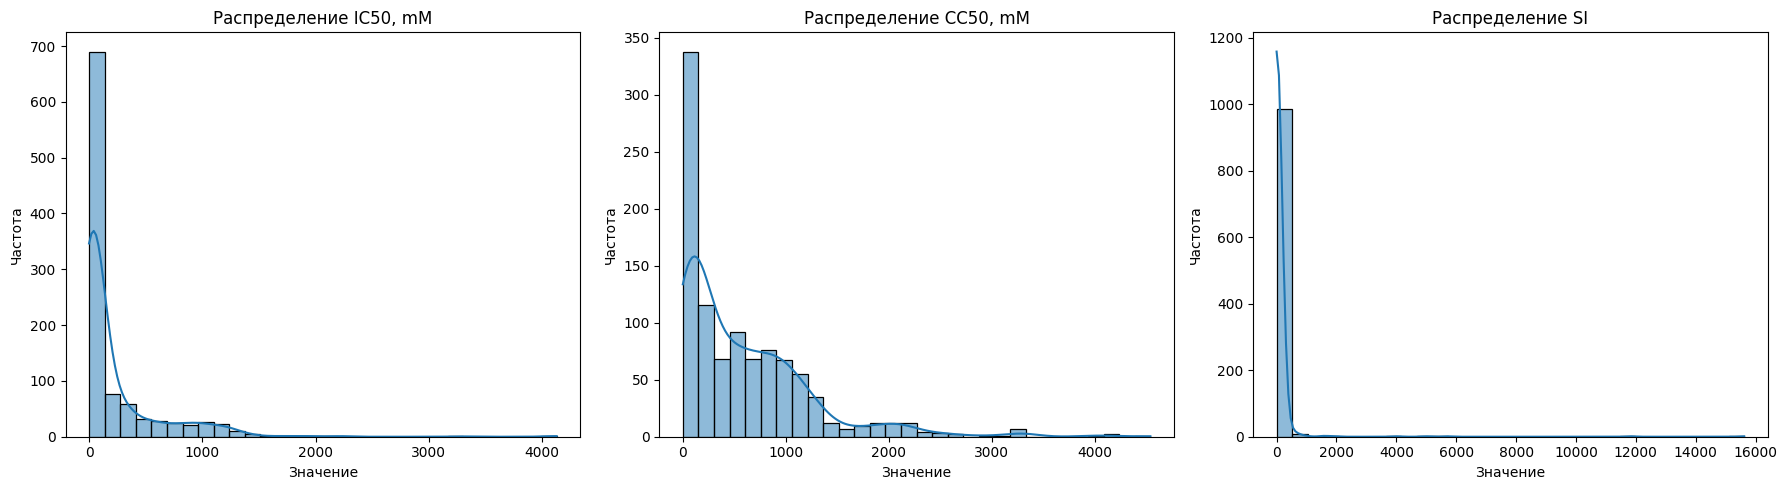

In [10]:
# Проведем расширенный анализ структуры данных
def data_summary(df):
    # Статистика по пропускам
    missing_stats = df.isnull().sum().sort_values(ascending=False)
    missing_stats = missing_stats[missing_stats > 0]

    if not missing_stats.empty:
        print(f"\nСтолбцы с пропусками:")
        for col, count in missing_stats.items():
            pct = (count / len(df)) * 100
            print(f"{col:<30}: {count} пропуска(ов) ({pct:.2f}%)")

    # Анализ уникальных значений
    print(f"\nНеповторяющиеся (уникальные) значения:")
    for col in df.columns:
        nunique = df[col].nunique()
        dtype = df[col].dtype
        if dtype == 'object' or nunique < 20:
            print(f"{col:<25}: {nunique} уникальных значений")

    # Статистика по целевым переменным
    targets = ['IC50, mM', 'CC50, mM', 'SI']
    print(f"\nСтатистика по целевым переменным")
    for target in targets:
        if target in df.columns:
            print(f"\n{target}:")
            print(df[target].describe().to_string())
            skew = df[target].skew()
            kurt = df[target].kurtosis()
            print(f"Асимметрия: {skew:.4f}, Эксцесс: {kurt:.4f}")

    # Визуализация распределения целевых переменных
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, target in enumerate(targets):
        if target in df.columns:
            sns.histplot(df[target], kde=True, ax=axes[i], bins=30)
            axes[i].set_title(f'Распределение {target}')
            axes[i].set_xlabel('Значение')
            axes[i].set_ylabel('Частота')
    plt.tight_layout()
    plt.show()

data_summary(df)

2. Обработка пропусков

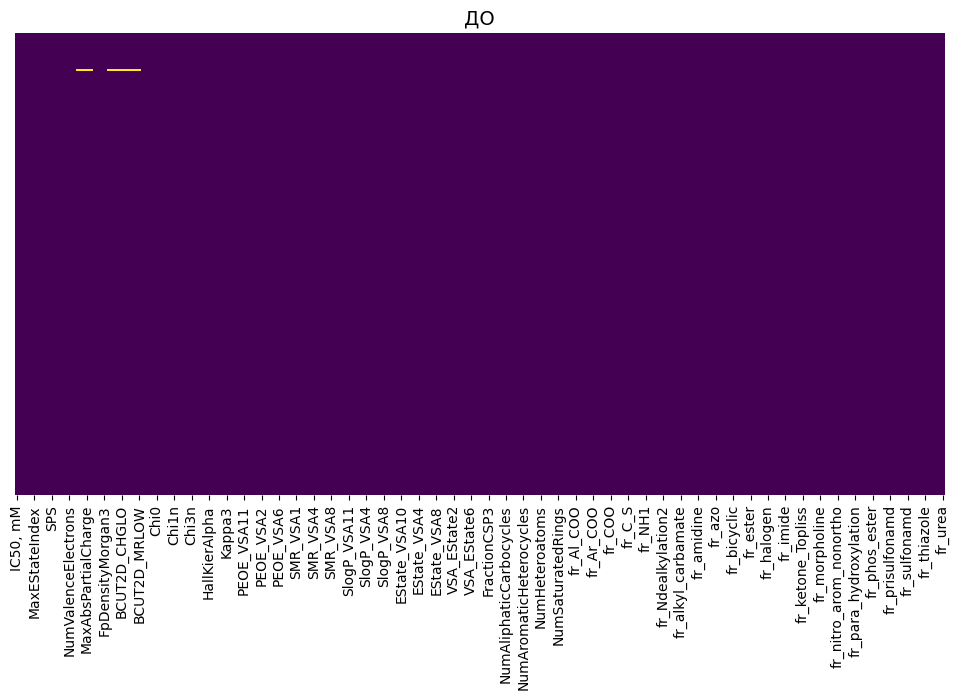

In [11]:
# Визуализация пропусков перед обработкой
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('ДО', fontsize=14)
plt.show()

In [12]:
# Разделение на числовые и категориальные признаки (мы как бы знаем, что их нет, но это правила хорошего тона)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Убираем целевые переменные из обработки (уже знаем, что там нет пропусков - см. выше)
numeric_features = [col for col in numeric_cols if col not in target_columns]

print(f"Числовых признаков: {len(numeric_features)}")
print(f"Категориальных признаков: {len(categorical_cols)}")

Числовых признаков: 210
Категориальных признаков: 0


In [13]:
# Импутация только для колонок с пропусками - с помощью медианы
missing_numeric = [col for col in numeric_features if df[col].isnull().any()]
if missing_numeric:
    numeric_imputer = SimpleImputer(strategy='median')
    df[missing_numeric] = numeric_imputer.fit_transform(df[missing_numeric])
    print(f"Числовые признаки с пропусками ({len(missing_numeric)} колонок): заполнены медианой.")
else:
    print("Числовых признаков с пропусками не найдено.")

# Проверка результата
total_missing_after = df.isnull().sum().sum()
print(f"Общее количество пропусков после обработки: {total_missing_after}")

Числовые признаки с пропусками (12 колонок): заполнены медианой.
Общее количество пропусков после обработки: 0


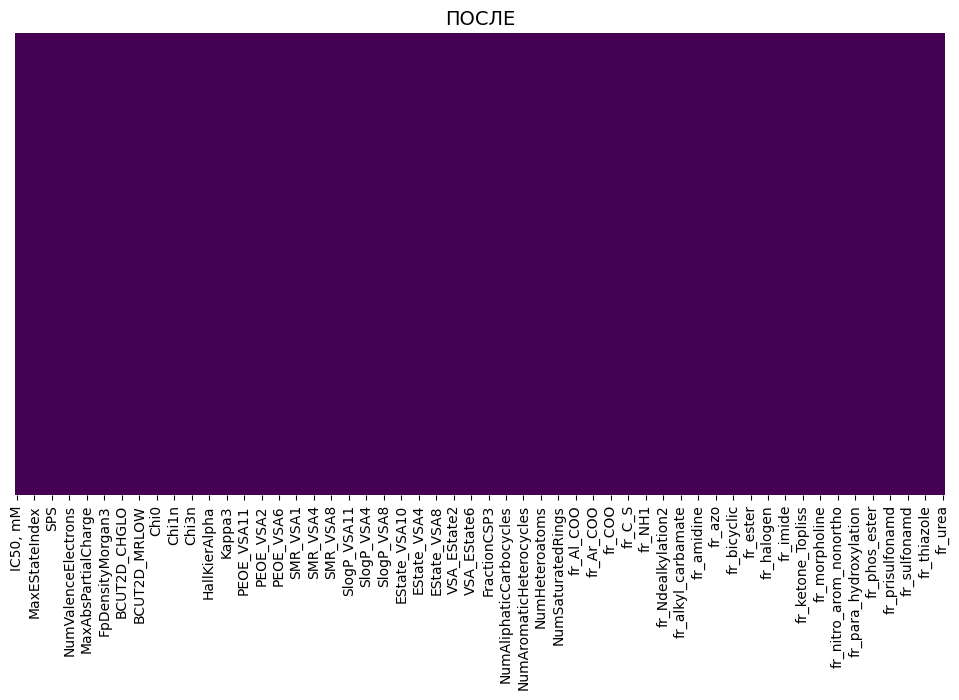

In [14]:
# Визуализация пропусков после обработки
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('ПОСЛЕ', fontsize=14)
plt.show()

3. Обработка дублирующихся строк (дубликатов)

Найдено дублирующихся строк: 32


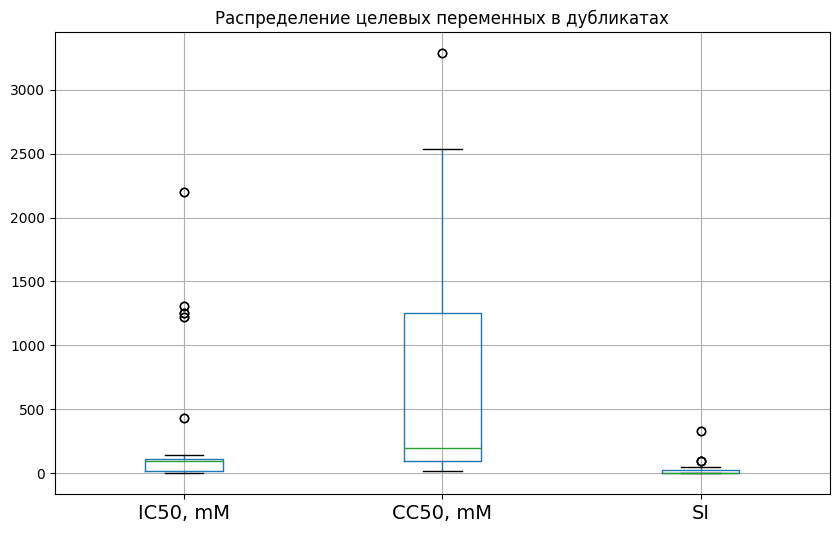

Удалено строк: 32
Новый размер датасета: (969, 213)


In [15]:
# Поиск дубликатов
initial_rows = len(df)
duplicates_count = df.duplicated().sum()
print(f"Найдено дублирующихся строк: {duplicates_count}")

if duplicates_count > 0:
    # Визуализация дубликатов
    duplicate_rows = df[df.duplicated(keep=False)]
    plt.figure(figsize=(10, 6))
    duplicate_rows[target_columns].boxplot()
    plt.title('Распределение целевых переменных в дубликатах')
    plt.xticks(fontsize=14)
    plt.show()

    # Удаление дубликатов
    df = df.drop_duplicates(keep='first')
    print(f"Удалено строк: {initial_rows - len(df)}")
    print(f"Новый размер датасета: {df.shape}")
else:
    print("Дублирующихся строк не найдено")

4. Анализ и обработка выбросов

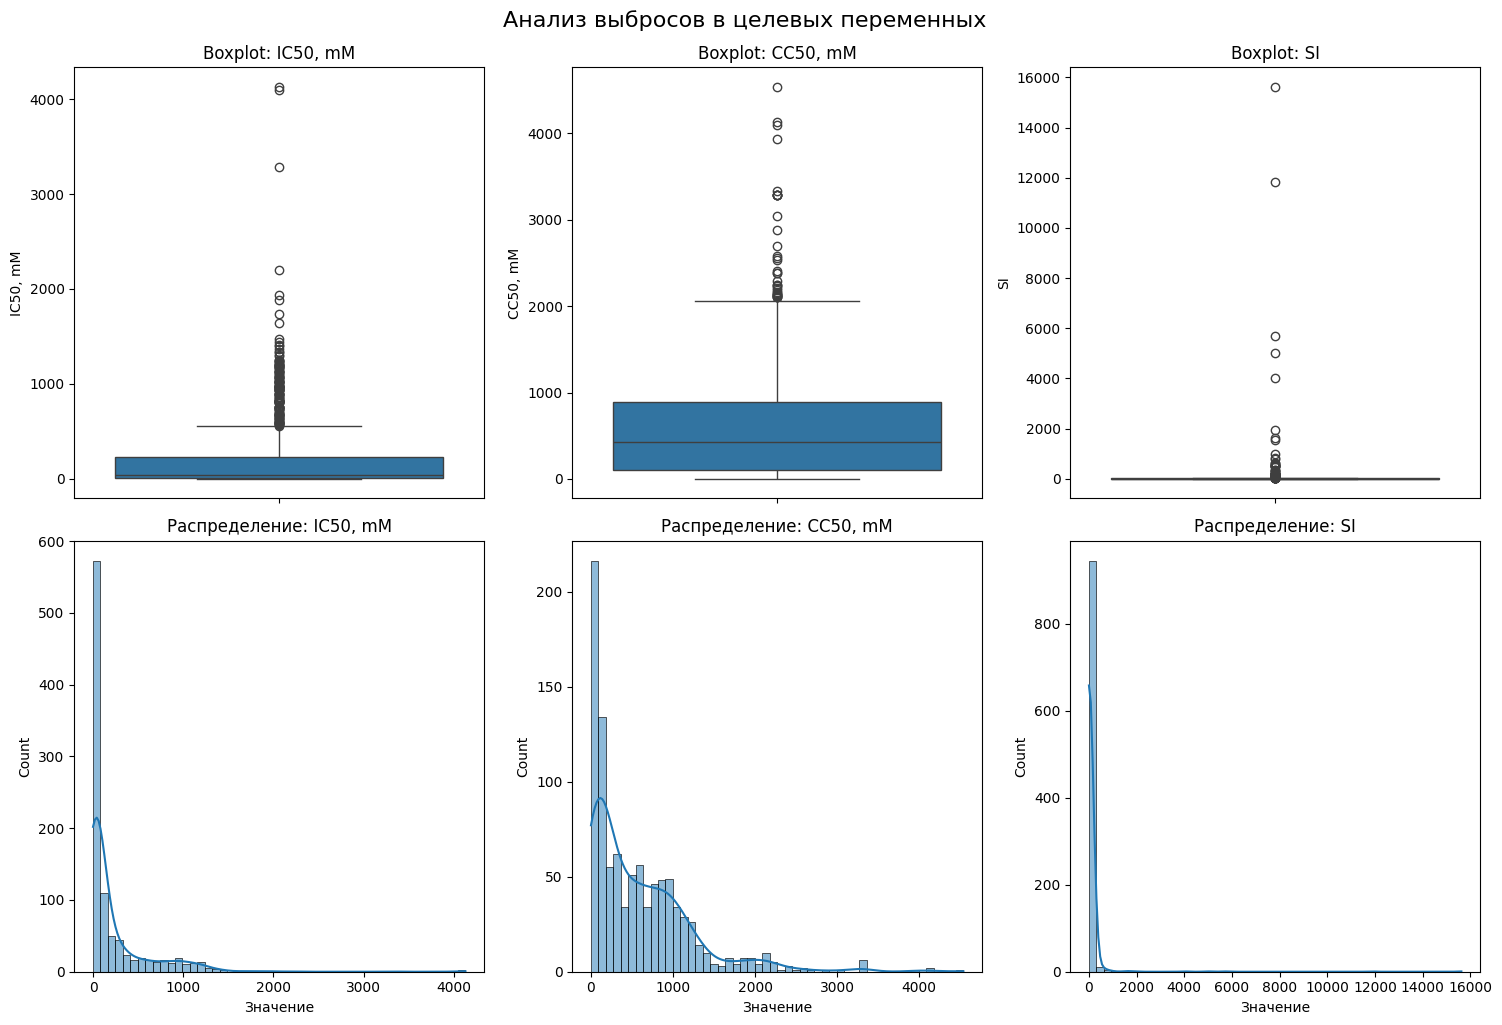

In [16]:
# Визуализация выбросов
plt.figure(figsize=(15, 10))

for i, col in enumerate(target_columns):
    if col in df.columns:
        # Boxplot
        plt.subplot(2, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot: {col}')

        # Распределение
        plt.subplot(2, 3, i+4)
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Распределение: {col}')
        plt.xlabel('Значение')

plt.tight_layout()
plt.suptitle('Анализ выбросов в целевых переменных', y=1.02, fontsize=16)
plt.show()

In [17]:
# Проведем количественный анализ выбросов
outliers_info = {}
for col in target_columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_pct = (len(outliers) / len(df)) * 100

        outliers_info[col] = {
            'count': len(outliers),
            'percentage': outliers_pct,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        print(f"\n{col}:")
        print(f"Выбросы: {len(outliers)} ({outliers_pct:.2f}%)")
        print(f"Границы: [{lower_bound:.4f}, {upper_bound:.4f}]")


IC50, mM:
Выбросы: 138 (14.24%)
Границы: [-315.7711, 559.6596]

CC50, mM:
Выбросы: 35 (3.61%)
Границы: [-1087.6670, 2079.4433]

SI:
Выбросы: 120 (12.38%)
Границы: [-20.8423, 38.7054]


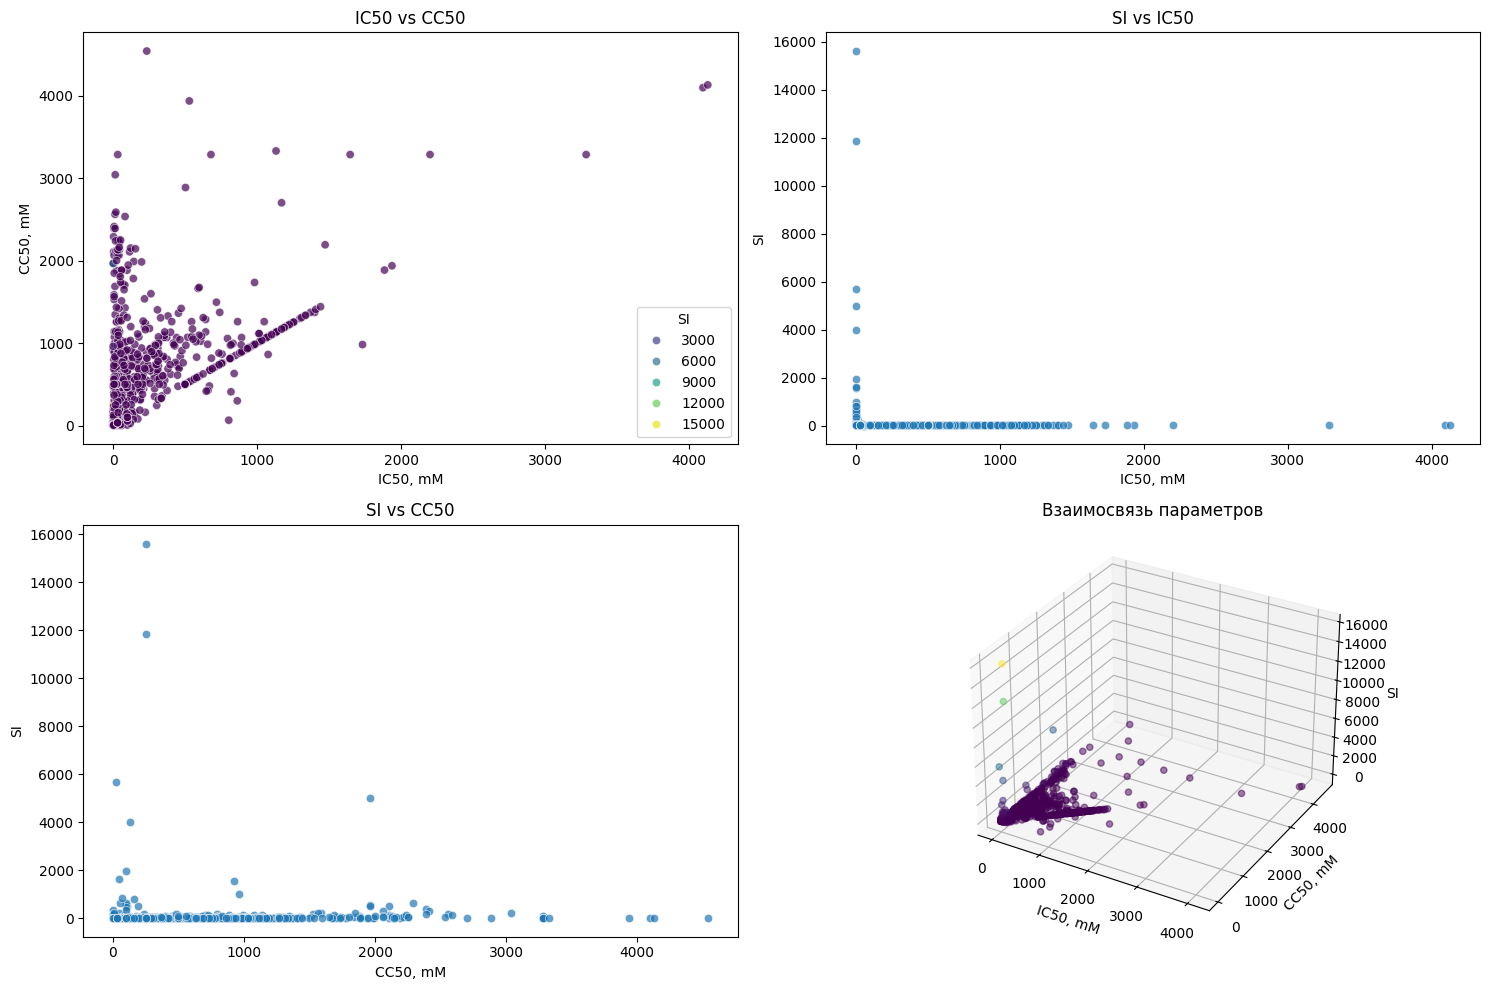

In [18]:
# Визуализация выбросов
if all(t in df.columns for t in target_columns):
    plt.figure(figsize=(15, 10))

    # IC50 vs CC50 с выделением выбросов
    plt.subplot(2, 2, 1)
    sns.scatterplot(data=df, x='IC50, mM', y='CC50, mM', hue='SI',
                   palette='viridis', alpha=0.7)
    plt.title('IC50 vs CC50')

    # SI vs IC50
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df, x='IC50, mM', y='SI', alpha=0.7)
    plt.title('SI vs IC50')

    # SI vs CC50
    plt.subplot(2, 2, 3)
    sns.scatterplot(data=df, x='CC50, mM', y='SI', alpha=0.7)
    plt.title('SI vs CC50')

    # 3D визуализация
    ax = plt.subplot(2, 2, 4, projection='3d')
    ax.scatter(df['IC50, mM'], df['CC50, mM'], df['SI'],
               c=df['SI'], cmap='viridis', alpha=0.5)
    ax.set_xlabel('IC50, mM')
    ax.set_ylabel('CC50, mM')
    ax.set_zlabel('SI')
    ax.set_title('Взаимосвязь параметров')

    plt.tight_layout()
    plt.show()

In [19]:
# Решение по выбросам
outlier_threshold = 10  # Если выбросов больше 10%
severe_outliers = {col: info for col, info in outliers_info.items() if info['percentage'] > outlier_threshold}

if severe_outliers:
    print(f"Столбцы с большим количеством выбросов (>{outlier_threshold}%):")
    for col, info in severe_outliers.items():
        print(f"  {col}: {info['percentage']:.1f}% выбросов")
else:
    print("Критических выбросов не обнаружено.")

Столбцы с большим количеством выбросов (>10%):
  IC50, mM: 14.2% выбросов
  SI: 12.4% выбросов


В общем, на основании того, что пишут в "интернетах" принято решение, не удалять выбросы, а применять логарифмирование, т.к. выбросы могут быть важными и их удаление может отразиться на итоговом результате. А учитывая, что была дана установка на ответственность, то вместо удаления будем логарифмировать данные. *Отнеситесь к выполнению задания ответственно, поскольку от качества проведённого анализа может зависеть эффективность и состав разрабатываемого лекарственного препарата.*

In [20]:
# Проведем анализ нормальности распределения
print("Анализ нормальности распределения:")
normality_results = {}
for col in target_columns:
    if col in df.columns:
        # Тест Шапиро-Уилка
        stat, p = shapiro(df[col])
        normality_results[col] = {'shapiro_p': p}

        # Тест нормальности
        stat, p = normaltest(df[col])
        normality_results[col]['normaltest_p'] = p

        print(f"{col}:")
        print(f"  Shapiro-Wilk p-value: {normality_results[col]['shapiro_p']:.4f}")
        print(f"  Normality test p-value: {normality_results[col]['normaltest_p']:.4f}")

Анализ нормальности распределения:
IC50, mM:
  Shapiro-Wilk p-value: 0.0000
  Normality test p-value: 0.0000
CC50, mM:
  Shapiro-Wilk p-value: 0.0000
  Normality test p-value: 0.0000
SI:
  Shapiro-Wilk p-value: 0.0000
  Normality test p-value: 0.0000


Все p-value = 0.0000, что < 0.05, т.е распределения IC50, CC50 и SI значимо отличаются от нормального.

In [21]:
# Преобразование переменных для нормализации распределений
for col in target_columns:
    if col in df.columns:
        # Логарифмическое преобразование
        df[f'log_{col}'] = np.log1p(df[col])

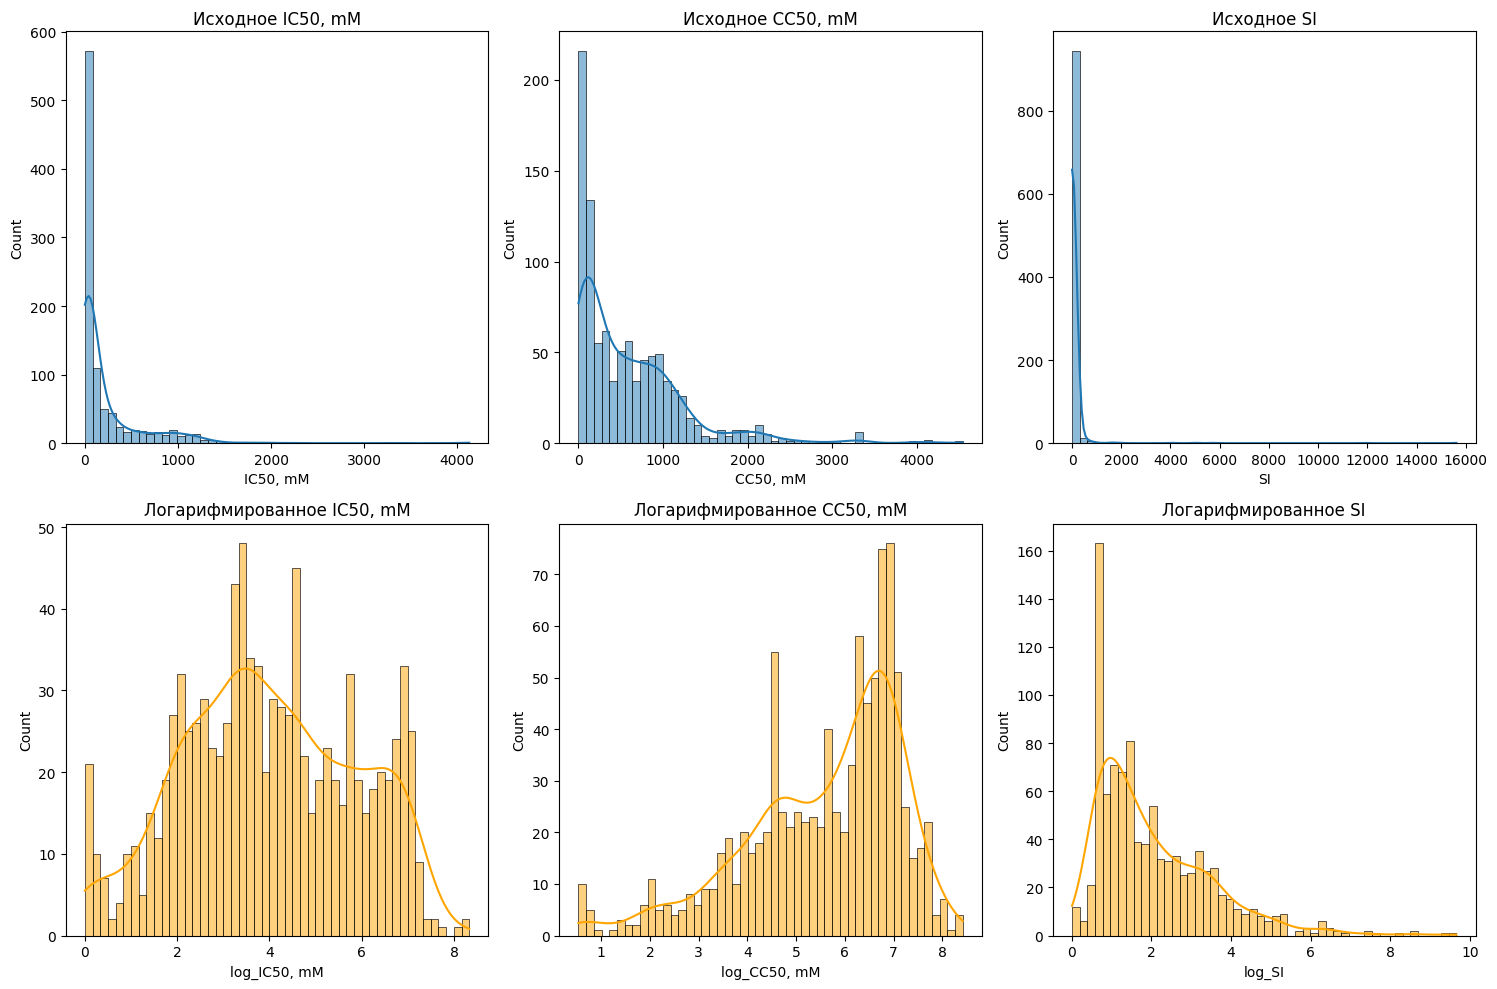

In [22]:
# Сравнение распределений до и после преобразований
plt.figure(figsize=(15, 10))
for i, col in enumerate(target_columns):
    if col in df.columns:
        # Исходное распределение
        plt.subplot(2, 3, i+1)
        sns.histplot(df[col], kde=True, bins=50)
        plt.title(f'Исходное {col}')

        # Логарифмированное распределение
        plt.subplot(2, 3, i+4)
        sns.histplot(df[f'log_{col}'], kde=True, bins=50, color='orange')
        plt.title(f'Логарифмированное {col}')

plt.tight_layout()
plt.show()

5. Анализ корреляций и работа с высококоррелироваными признаками

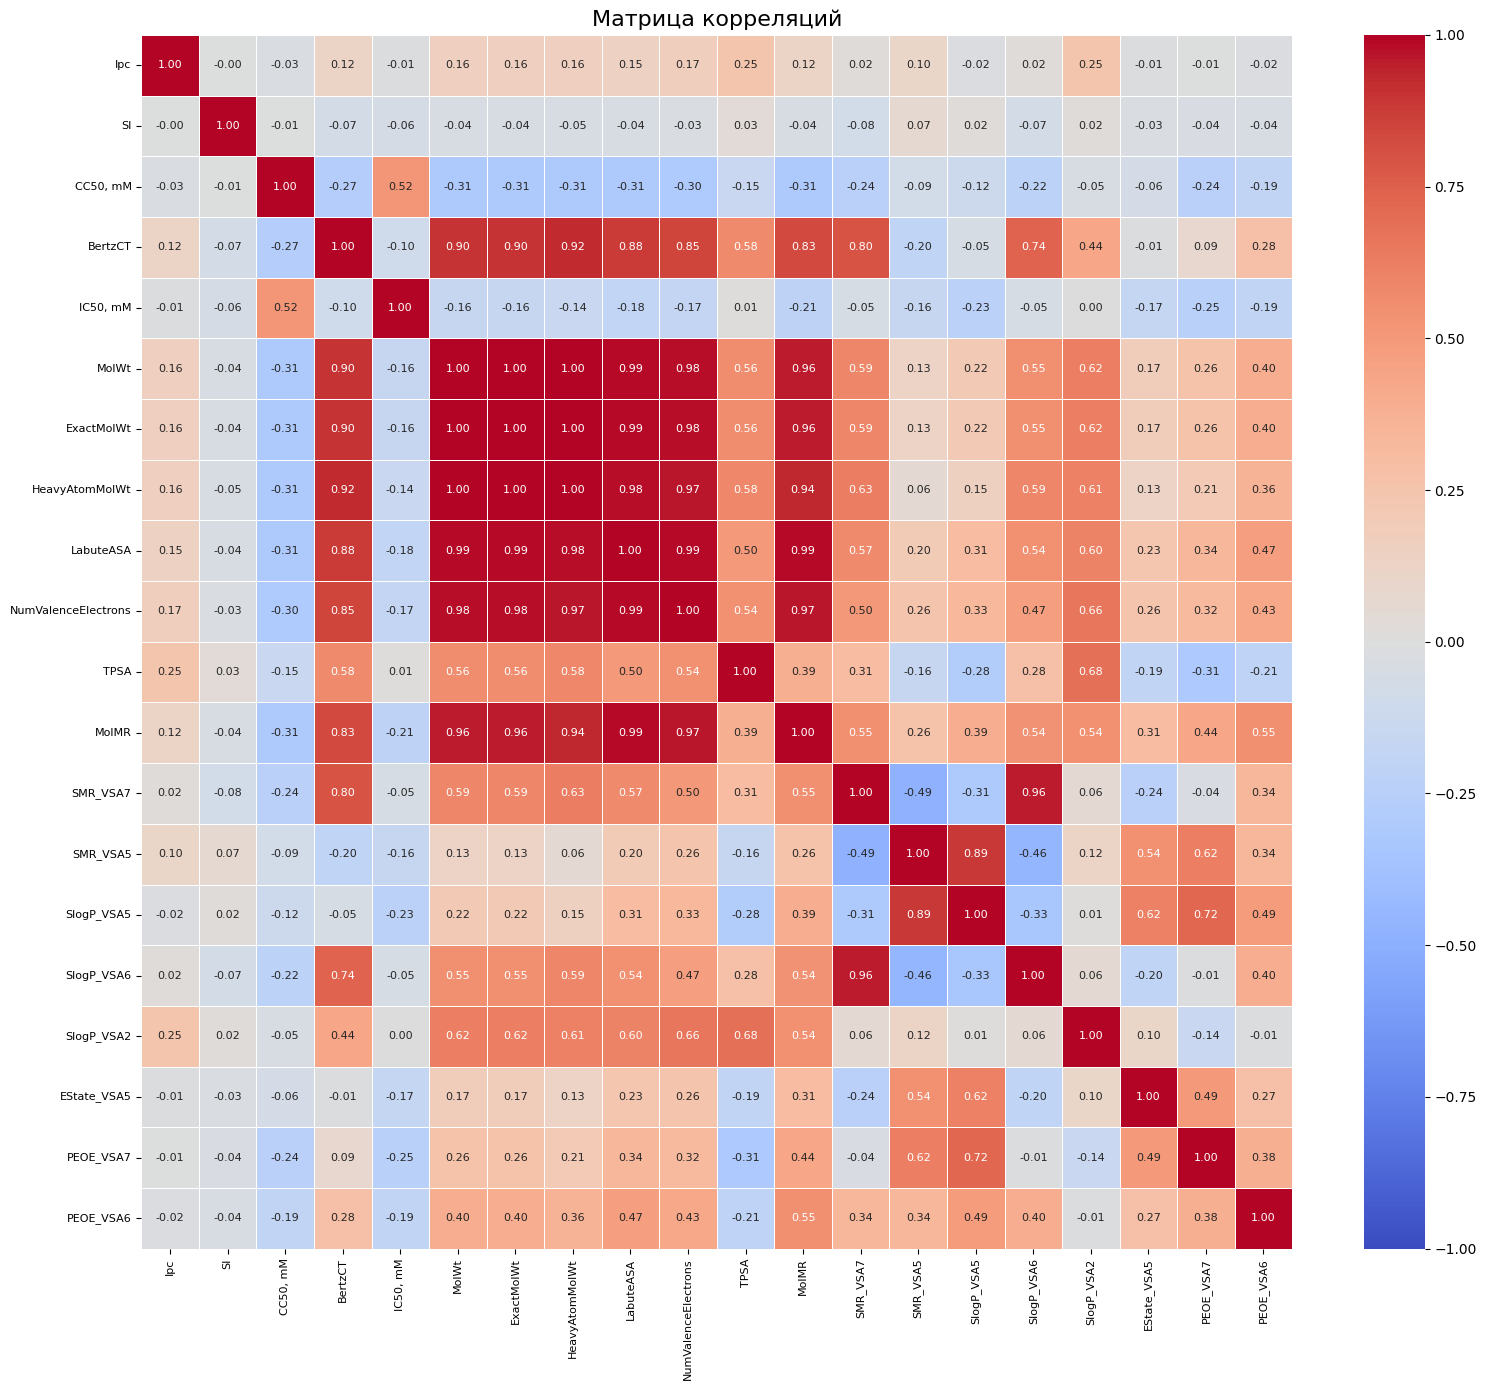

In [23]:
# Посмотрим на матрицу корреляций
df = df.select_dtypes(include=np.number)

# Для больших наборов признаков возьмем топ-20 по дисперсии
if len(df.columns) > 20:
    top_variance = df.var().sort_values(ascending=False).head(20).index
    corr_matrix = df[top_variance].corr()
else:
    corr_matrix = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 8})
plt.title('Матрица корреляций', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [24]:
# Анализ мультиколлинеарности
high_corr_pairs = []
corr_threshold = 0.95

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

if high_corr_pairs:
    print(f"\nНайдено {len(high_corr_pairs)} пар признаков с корреляцией > {corr_threshold}:")
    for pair in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:20]:
        print(f"  {pair[0]} ↔ {pair[1]}: {pair[2]:.3f}")
else:
    print("\nВысококоррелированных признаков не обнаружено")


Найдено 15 пар признаков с корреляцией > 0.95:
  MolWt ↔ ExactMolWt: 1.000
  MolWt ↔ HeavyAtomMolWt: 0.997
  ExactMolWt ↔ HeavyAtomMolWt: 0.997
  LabuteASA ↔ NumValenceElectrons: 0.990
  ExactMolWt ↔ LabuteASA: 0.989
  MolWt ↔ LabuteASA: 0.989
  LabuteASA ↔ MolMR: 0.986
  ExactMolWt ↔ NumValenceElectrons: 0.981
  MolWt ↔ NumValenceElectrons: 0.981
  HeavyAtomMolWt ↔ LabuteASA: 0.977
  NumValenceElectrons ↔ MolMR: 0.968
  HeavyAtomMolWt ↔ NumValenceElectrons: 0.966
  SMR_VSA7 ↔ SlogP_VSA6: 0.959
  ExactMolWt ↔ MolMR: 0.957
  MolWt ↔ MolMR: 0.957


In [30]:
def remove_highcorrfeatures(df, threshold=0.95):
    """
    Удаляет высококоррелированные признаки, оставляя признак у которого дисперсия юольше (если дисперсия очень мала, то признак малоинформативен)
    """
    # Вычисляем матрицу корреляций
    corr_matrix = df.corr().abs()

    # Верхний треугольник матрицы корреляций
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Находим признаки с корреляцией выше порога
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Для каждого удаляемого признака проверяем дисперсию
    final_to_drop = []
    for col in to_drop:
        # Находим все признаки, коррелированные с текущим
        correlated_cols = list(upper.index[upper[col] > threshold])
        # Добавляем текущий признак в список для сравнения
        correlated_cols.append(col)
        # Выбираем признак с минимальной дисперсией для удаления
        variances = {c: df[c].var() for c in correlated_cols}
        min_var_col = min(variances, key=variances.get)

        if min_var_col not in final_to_drop:
            final_to_drop.append(min_var_col)

    return df.drop(columns=final_to_drop), final_to_drop

# Применяем функцию удаления (только к признакам, не к целевым переменным)
features_df = df.drop(columns=target_columns, errors='ignore')
df_filtered, dropped_columns = remove_highcorrfeatures(features_df, threshold=0.9)

# Восстанавливаем целевые переменные
df = pd.concat([df_filtered, df[target_columns]], axis=1)

print("Удаленные признаки:")
print(dropped_columns)

Удаленные признаки:
[]


Провели 4 итерации для того, чтобы удалить высокоррелированные признаки, можно, конечно сделать через цикл while, но гораздно интереснее вручную с контролем на матрице исчезающих признаков.

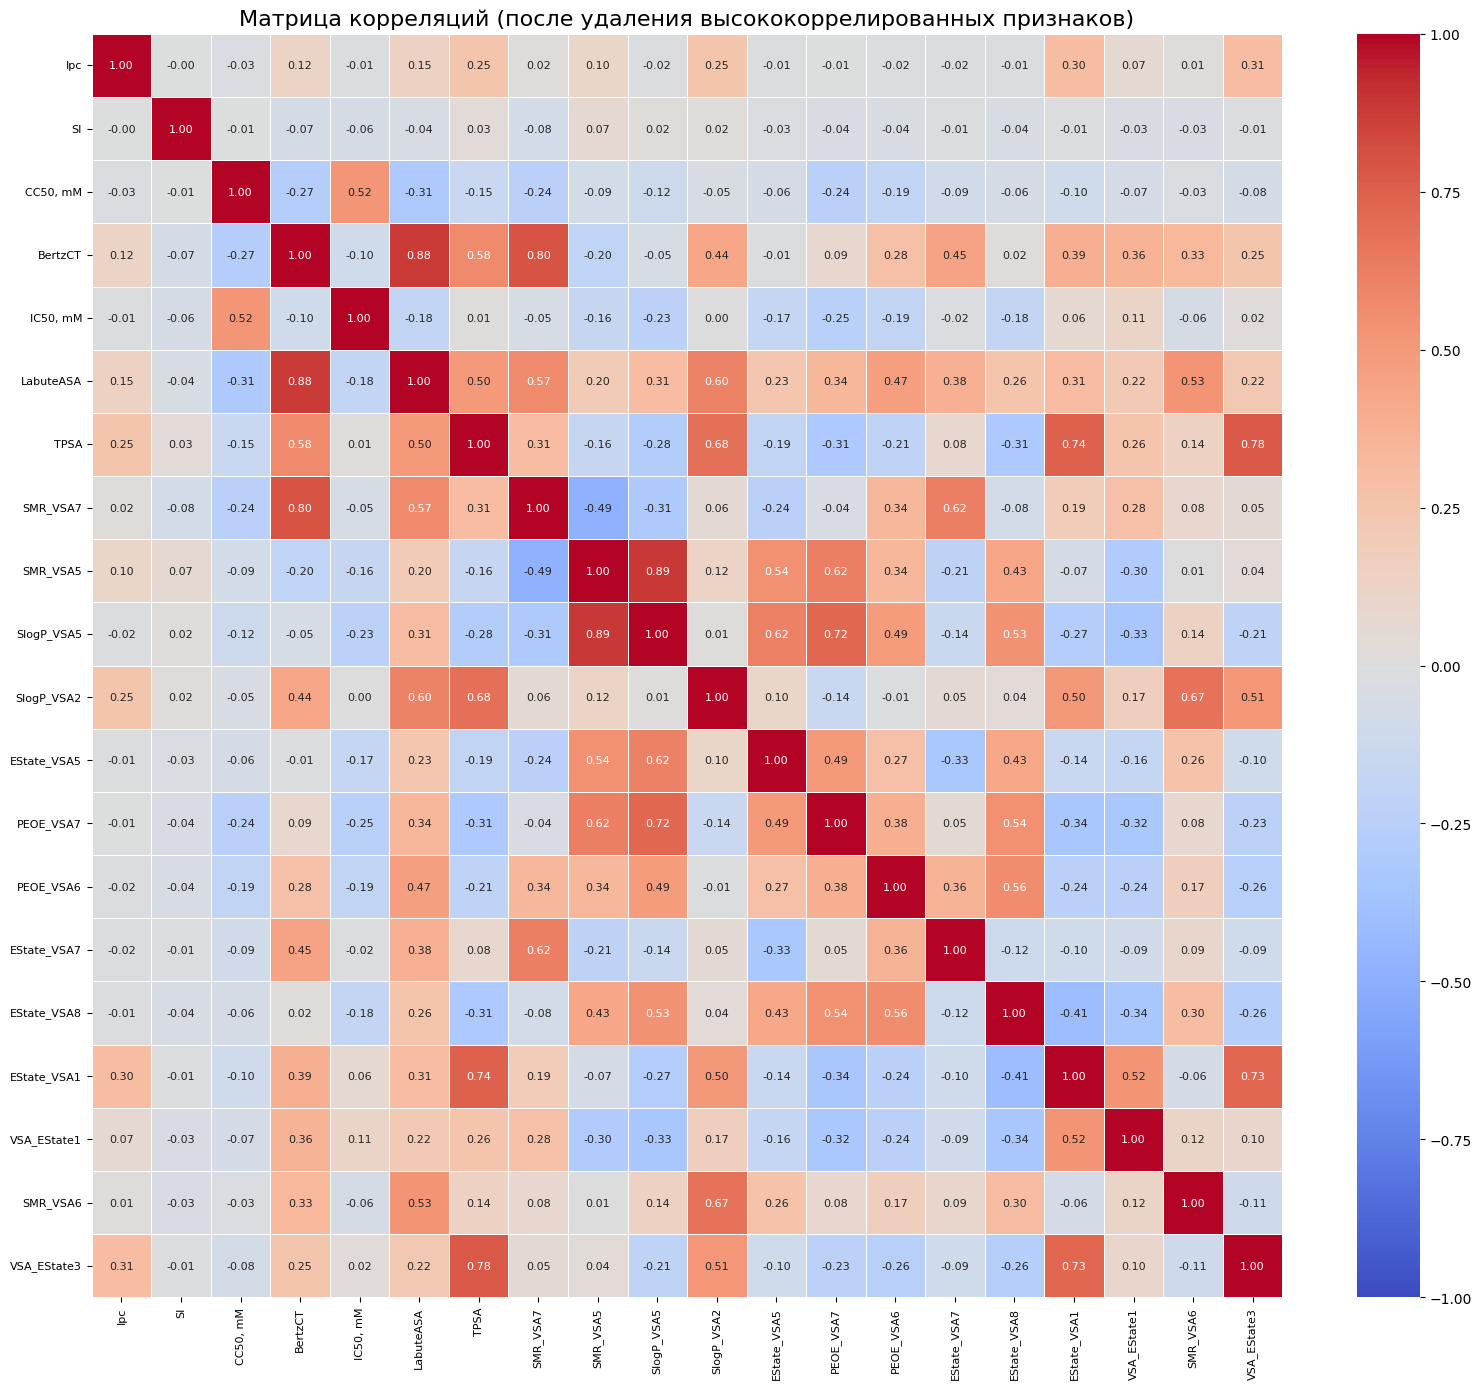

In [31]:
# Посмотрим на матрицу корреляций после удаления высококоррелированных признаков
df = df.select_dtypes(include=np.number)

# Для больших наборов признаков возьмем топ-20 по дисперсии
if len(df.columns) > 20:
    top_variance = df.var().sort_values(ascending=False).head(20).index
    corr_matrix = df[top_variance].corr()
else:
    corr_matrix = df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, linewidths=0.5, annot_kws={"size": 8})
plt.title('Матрица корреляций (после удаления высококоррелированных признаков)', fontsize=16)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

6. Feature engineering

In [32]:
def create_advanced_chemical_features(df):
    """Создаем химически значимые признаки"""
    new_features = []

    # 1. Электронные свойства (развитие Charge_Balance)
    if all(col in df.columns for col in ['MaxPartialCharge', 'MinPartialCharge']):
        # Разность зарядов
        df['Charge_Difference'] = df['MaxPartialCharge'] - df['MinPartialCharge']
        new_features.append('Charge_Difference')
        # Стабильность заряда
        df['Charge_Stability'] = np.exp(-(df['MaxPartialCharge'] - df['MinPartialCharge']).abs())
        new_features.append('Charge_Stability')

    # 2. Признаки на основе EState
    estate_cols = [col for col in df.columns if 'EState' in col]
    if estate_cols:
        # Разброс
        df['EState_Range'] = df[['MaxEStateIndex', 'MinEStateIndex']].max(axis=1) - df[['MaxEStateIndex', 'MinEStateIndex']].min(axis=1)
        new_features.append('EState_Range')

    # 3. Признаки функциональных групп
    fr_cols = [col for col in df.columns if col.startswith('fr_')]
    if fr_cols:
        # Общее количество функциональных групп
        df['Total_Functional_Groups'] = df[fr_cols].sum(axis=1)
        new_features.append('Total_Functional_Groups')
        # Разнообразие функциональных групп
        df['Functional_Diversity'] = (df[fr_cols] > 0).sum(axis=1)
        new_features.append('Functional_Diversity')

    # 4. Комбинированные признаки с Polarity_Index
    if 'Polarity_Index' in df.columns and 'qed' in df.columns:
        # Эффективность полярности
        df['Polarity_Efficiency'] = df['Polarity_Index'] / (df['qed'] + 1e-6)
        new_features.append('Polarity_Efficiency')

    # 5. Признаки молекулярной сложности
    if 'FpDensityMorgan3' in df.columns and 'SPS' in df.columns:
        # Индекс молекулярной сложности
        df['Complexity_Score'] = df['FpDensityMorgan3'] * np.log1p(df['SPS'])
        new_features.append('Complexity_Score')

    print(f"Создано {len(new_features)} новых химических признаков.")
    return df, new_features

# Применяем функцию
df, new_chemical_features = create_advanced_chemical_features(df)

# Проверяем результат
if new_chemical_features:
    print("\nСозданные признаки:")
    print(df[new_chemical_features].head())
else:
    print("Не удалось создать новые химические признаки")

Создано 6 новых химических признаков.

Созданные признаки:
   Charge_Difference  Charge_Stability  EState_Range  Total_Functional_Groups  \
0           0.332369          0.717222      4.706871                       11   
1           0.326294          0.721593      3.427548                        9   
2           0.420375          0.656801      2.083887                       11   
3           0.332369          0.717223      4.706757                       12   
4           0.320137          0.726050      4.880034                        8   

   Functional_Diversity  Complexity_Score  
0                     4          4.998389  
1                     3          4.928514  
2                     4          4.353918  
3                     4          4.924259  
4                     3          4.556793  


Создано 6 новых химически значимых признаков:

1. Charge_Difference (разность зарядов)

2. Charge_Stability (стабильность заряда)

3. EState_Range (разброс электронных индексов)

4. Total_Functional_Groups (общее количество функциональных групп)

5. Functional_Diversity (разнообразие функциональных групп)

6. Complexity_Score (индекс молекулярной сложности)

Примечание. Было создано еще несколько признаков, но от них было решено отказаться по разным причинам, например, от EState_Mean (средний электронный индекс), так как его отрицательная корреляция с SI ухудшала селективность и, следовательно, требовала осторожного использования в моделях.

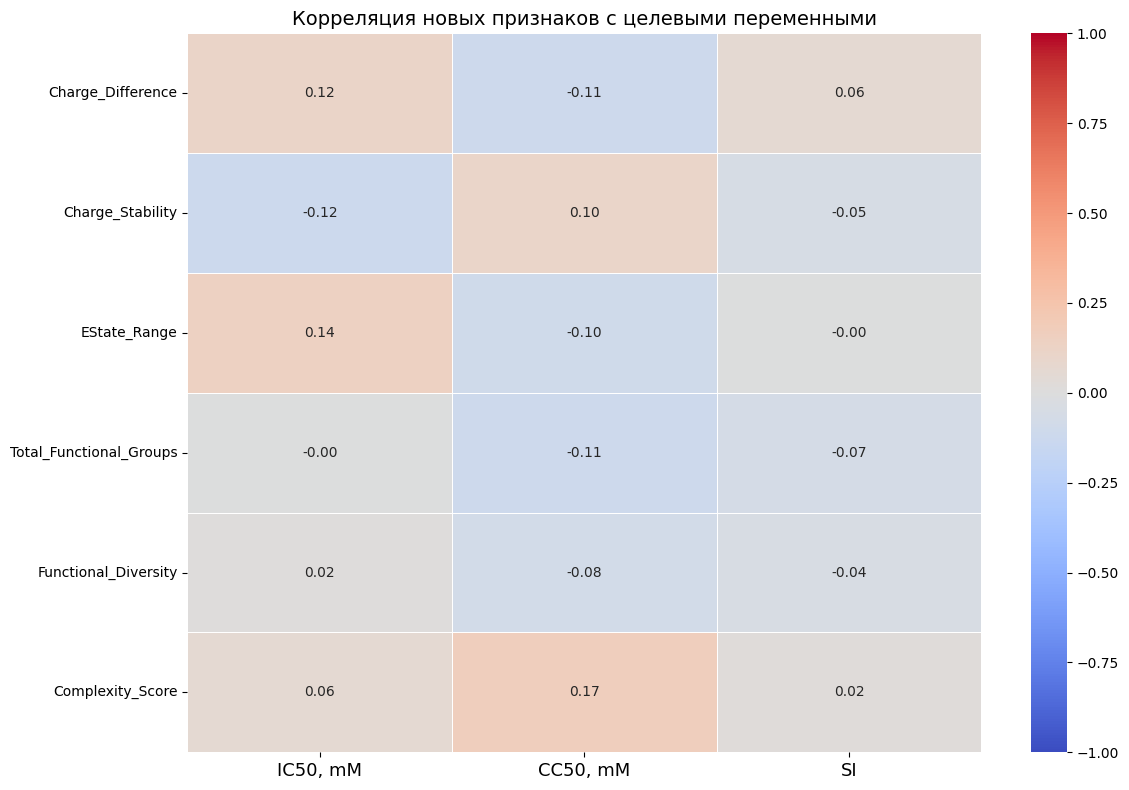

In [33]:
# Анализ корреляций с целевыми переменными
if new_chemical_features:
    # Собираем все целевые переменные
    target_columns = ['IC50, mM', 'CC50, mM', 'SI']
    analysis_cols = new_chemical_features + target_columns

    # Вычисляем корреляции
    corr_matrix = df[analysis_cols].corr()

    # Визуализируем только связи с целевыми переменными
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix.loc[new_chemical_features, target_columns],
                annot=True, cmap='coolwarm',
                vmin=-1, vmax=1, fmt=".2f",
                linewidths=0.5, annot_kws={"size": 10})

    plt.title('Корреляция новых признаков с целевыми переменными', fontsize=14)
    plt.xticks(fontsize=13)
    plt.tight_layout()
    plt.show()


Все корреляции нагенерированных признаков с целевыми переменными (IC50, CC50, SI) в районе 0,17 и ниже, что говорит о том, что созданные признаки не имеют сильной линейной связи с целевыми переменными. Но эти признаки могут быть полезны в ансамблевых моделях, которые улавливают нелинейные зависимости, поэтому оставим их. Это была попытка создать признаки, основанные на химически значимых агрегациях, но пробелы в знаниях по Химии, видимо не позволили этого сделать. Также предпринимались попытки создания различного рода квадратичных признаков, но они также были оставлены по причине осознания их бессмысленности - т.е. мы почистили датасет, а потом сами же перегрузили его мусорными признаками, которые дублируют информацию и не создают никакой добавленной ценности.

7. Сохраняем результаты EDA для дальнейшей работы

In [34]:
# Создаем Excel файл с результатами нашей предобработки
df.to_excel('EDAprocessed_data.xlsx', sheet_name='ProcessedData', index=False)

print(f"Файл 'EDAprocessed_data.xlsx' создан успешно! Размер данных: {df.shape[0]} строк × {df.shape[1]} столбцов.")

Файл 'EDAprocessed_data.xlsx' создан успешно! Размер данных: 969 строк × 178 столбцов.
